In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats

auto_df= pd.read_csv(r'auto-mpg.csv')
auto_df.head()

,Unnamed: 0,displacement,horsepower,weight,acceleration,mpg
0,0,307.0,130,3504,12.0,18.0
1,1,350.0,165,3693,11.5,15.0
2,2,318.0,150,3436,11.0,18.0
3,3,304.0,150,3433,12.0,16.0
4,4,302.0,140,3449,10.5,17.0


In [2]:
auto_df=auto_df.drop("Unnamed: 0", axis=1)
auto_df.head()

,displacement,horsepower,weight,acceleration,mpg
0,307.0,130,3504,12.0,18.0
1,350.0,165,3693,11.5,15.0
2,318.0,150,3436,11.0,18.0
3,304.0,150,3433,12.0,16.0
4,302.0,140,3449,10.5,17.0


In [3]:
y=auto_df['mpg']
x=auto_df.drop ('mpg', axis=1)
x.head()

,displacement,horsepower,weight,acceleration
0,307.0,130,3504,12.0
1,350.0,165,3693,11.5
2,318.0,150,3436,11.0
3,304.0,150,3433,12.0
4,302.0,140,3449,10.5


In [4]:
model = sm.OLS(y, sm.add_constant(x)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     233.4
Date:                Thu, 06 Nov 2025   Prob (F-statistic):          9.63e-102
Time:                        10:37:23   Log-Likelihood:                -1120.6
No. Observations:                 392   AIC:                             2251.
Df Residuals:                     387   BIC:                             2271.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           45.2511      2.456     18.424      0.000      40.422      50.080
displacement    -0.0060      0.007     -0.894      0.372      -0.019       0.007
horsepower      -0.0436      0.017     -2.631      0.009      -0.076      -0.011
weight          -0.0053      0.001     -6.512      0.000      -0.007      -0.004
acceleration    -0.0231      0.126     -0.184      0.854      -0.270       0.224
==============================================================================
Omnibus:                       38.359   Durbin-Watson:                   0.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.333
Skew:                           0.715   Prob(JB):                     7.13e-12
Kurtosis:                       4.049   Cond. No.                     3.56e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

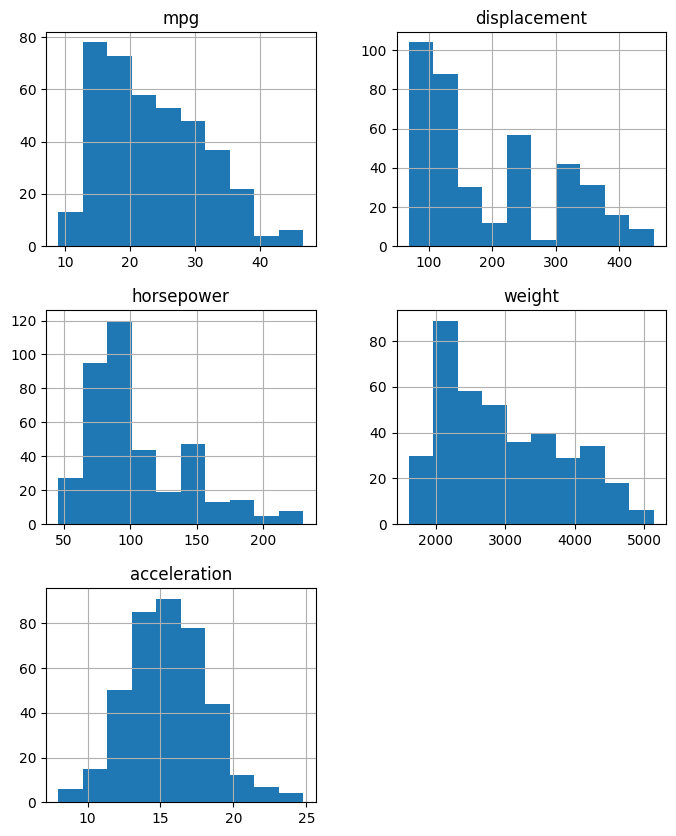

In [5]:
import matplotlib.pyplot as plt
auto_df[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']]\
    .hist(figsize=(8, 10));

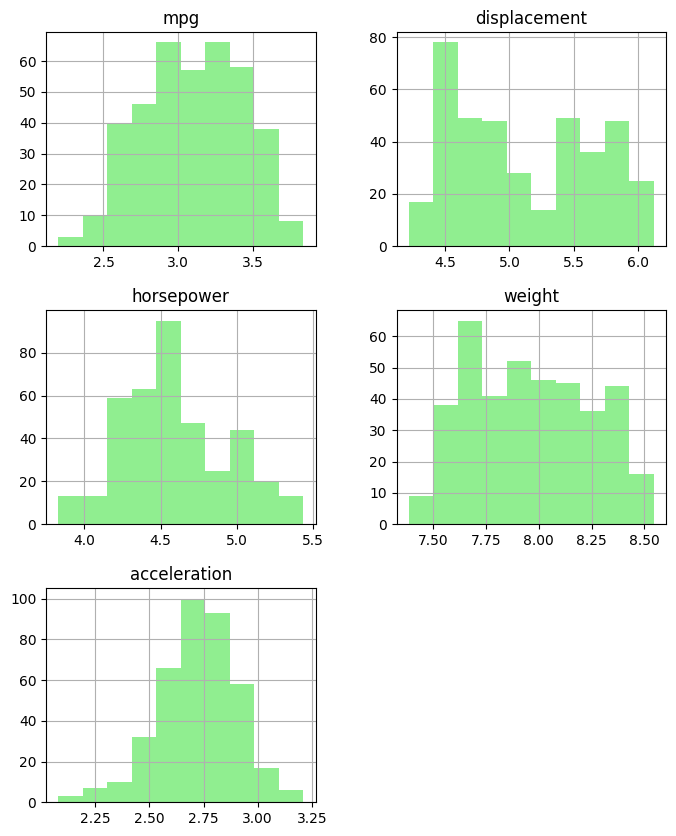

In [6]:
np.log(auto_df[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']])\
    .hist(figsize=(8, 10), color="lightgreen");

In [7]:
auto_df.columns

Index(['displacement', 'horsepower', 'weight', 'acceleration', 'mpg'], dtype='object')

In [8]:
ylog= np.log(auto_df['mpg'])
x_log= np.log(auto_df[['displacement', 'horsepower', 'weight', 'acceleration']])


In [9]:
log_model= sm.OLS(ylog, sm.add_constant(x_log)).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     399.6
Date:                Thu, 06 Nov 2025   Prob (F-statistic):          6.07e-136
Time:                        11:13:14   Log-Likelihood:                 187.62
No. Observations:                 392   AIC:                            -365.2
Df Residuals:                     387   BIC:                            -345.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            9.3480      0.453     20.637      0.000       8.457      10.239
displacement    -0.1620      0.047     -3.434      0.001      -0.255      -0.069
horsepower      -0.5156      0.074     -6.993      0.000      -0.661      -0.371
weight          -0.2915      0.107     -2.731      0.007      -0.501      -0.082
acceleration    -0.2689      0.079     -3.421      0.001      -0.424      -0.114
==============================================================================
Omnibus:                        9.134   Durbin-Watson:                   1.013
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               12.050
Skew:                           0.207   Prob(JB):                      0.00242
Kurtosis:                       3.752   Cond. No.                         661.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
from statsmodels.stats.diagnostic import kstest_normal

In [13]:
kstest_normal(log_model.resid)

(np.float64(0.0443084111880106), np.float64(0.06679965938383678))